In [4]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
markers=[ '--', '-.', ':', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted']

colors= ["b", "orange", "r", "c", "m", "grey", "black", "violet", "skyblue", "brown", "darkgoldenrod", "khaki", "cornflowerblue", "lightpink", "lime"]

noises=[0.1, 0.2, 0.3, 0.4, 0.15, 0.24, 0.34, 0.44, 0.27, 0.37, 0, 0.13, 0.41, 0.22, 0.33, 0.2]

In [5]:
df = pd.read_csv("feature_mapping.csv")
ids = df["Userid"].unique()

print(ids)

headers = []
for col in df:
    headers.append(col)

print(headers)

[158455 313449 351278 446875 453897 483491 494149 547832 738648 773684
 873115 931499 953571]
['Userid', 'Still Morning', 'Still Afternoon', 'Still Evening', 'Still Night', 'Running Morning', 'Running Afternoon', 'Running Evening', 'Running Night', 'ADHD', 'ADHDScore', 'Survey Dates']


In [6]:
dfADHD = df[df["ADHD"]==1]

dfADHD

dfNone = df[df["ADHD"]==0]


In [8]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

In [21]:
dfADHD['Userid'] = dfADHD['Userid'].astype('category')

#tilt the date on the x-axis!!!!

fig = px.scatter(dfADHD, 
                 x = 'Survey Dates',
                 y = 'Still Morning',
                 template = 'simple_white', 
                hover_name = 'Userid', 
                 color = 'Userid',
                 labels = {"Still Morning": "Morning Still (min)"},
                 title= "Participants with ADHD Morning Still Time")

fig.show()

# fig.update_xaxes(tickangle = 30)

# fig.show()

C:\Users\Ying Zhu\AppData\Local\Temp\ipykernel_22040\2326284141.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
fig = px.scatter(dfADHD, 
                 x = 'Survey Dates',
                 y = 'Running Night',
                 template = 'simple_white', 
                hover_name = 'Userid', 
                 color = 'Userid',
                 labels = {"Running Night": "Night Running (min)"},
                 title= "Participants with ADHD Night Running Time")

fig.show()

# fig.update_xaxes(tickangle = 30)

# fig.show()

In [11]:
dfNone['Userid'] = dfNone['Userid'].astype('category')

#tilt the date on the x-axis!!!!

fig = px.scatter(dfNone, 
                 x = 'Survey Dates',
                 y = 'Still Morning',
                 template = 'simple_white', 
                hover_name = 'Userid', 
                 color = 'Userid',
                 labels = {"Still Morning": "Morning Still (min)"},
                 title= "Participants without ADHD Morning Still Time")

fig.show()

# fig.update_xaxes(tickangle = 30)

# fig.show()

C:\Users\Ying Zhu\AppData\Local\Temp\ipykernel_41316\3520973971.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
fig = px.scatter(dfNone, 
                 x = 'Survey Dates',
                 y = 'Running Night',
                 template = 'simple_white', 
                hover_name = 'Userid', 
                 color = 'Userid',
                 labels = {"Running Night": "Night Running (min)"},
                 title= "Participants without ADHD Night Running Time")

fig.show()

# fig.update_xaxes(tickangle = 30)

# fig.show()

In [25]:
dfPivot = dfADHD.melt(id_vars = ['Userid','Survey Dates'], value_vars = ['Still Morning','Still Afternoon', 'Still Evening', 'Still Night', 'Running Morning', 'Running Afternoon', 'Running Evening', 'Running Night'], var_name = 'Activity Kind and When', value_name = 'Duration Time')

dfPivot

,Userid,Survey Dates,Activity Kind and When,Duration Time
0,158455,2022-11-01,Still Morning,68.571429
1,158455,2022-11-11,Still Morning,24.000000
2,158455,2022-12-09,Still Morning,34.285714
3,158455,2022-12-22,Still Morning,42.857143
4,313449,2022-04-17,Still Morning,73.471356
...,...,...,...,...
451,953571,2022-04-29,Running Night,0.000000
452,953571,2022-05-20,Running Night,57.500000
453,953571,2022-05-28,Running Night,0.000000
454,953571,2022-06-10,Running Night,0.000000


In [28]:
dfPivot['Userid'] = dfPivot['Userid'].astype('category')

g = sns.relplot(kind = 'scatter',
            x = 'Survey Dates',
            y = 'Duration Time',
            hue = 'Userid',
            col = 'Activity Kind and When', 
            col_wrap = 4,
            data = dfPivot)

g

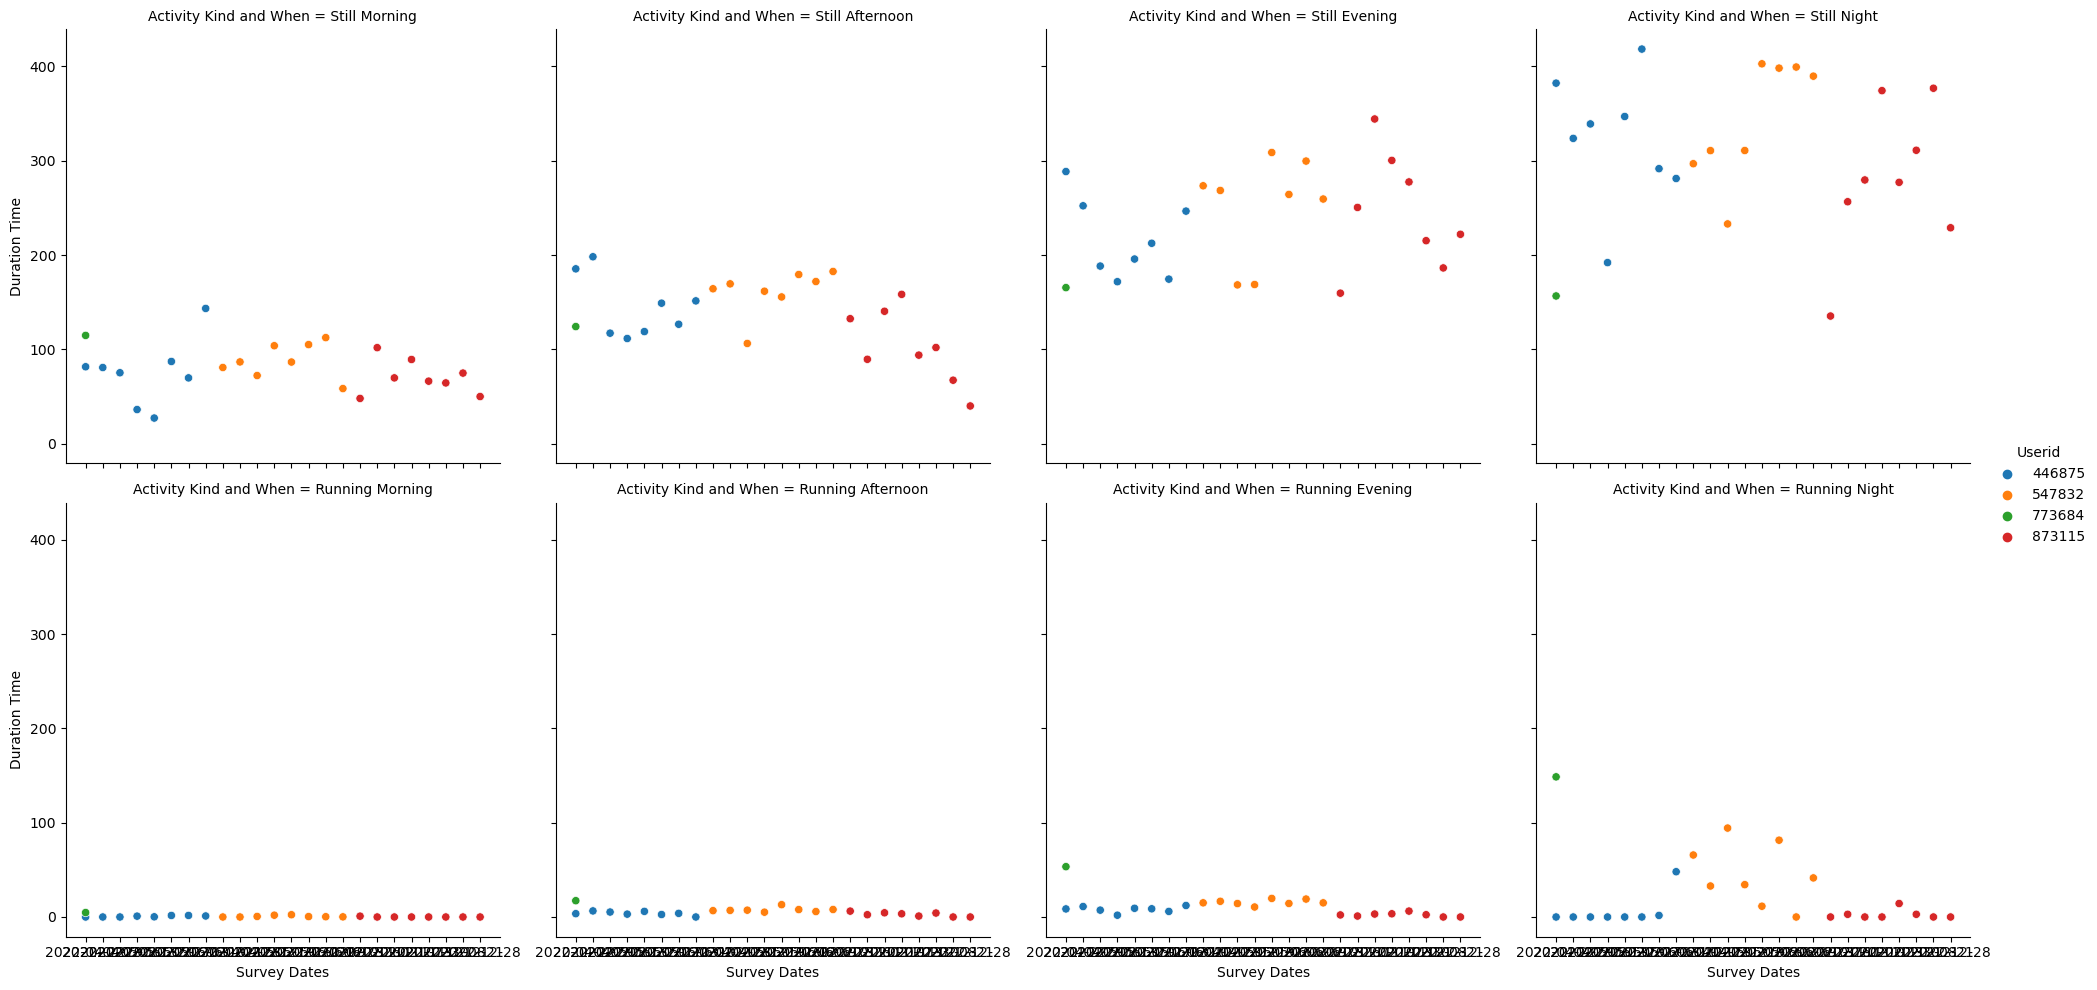

In [9]:
dfPivot = dfNone.melt(id_vars = ['Userid','Survey Dates'], value_vars = ['Still Morning','Still Afternoon', 'Still Evening', 'Still Night', 'Running Morning', 'Running Afternoon', 'Running Evening', 'Running Night'], var_name = 'Activity Kind and When', value_name = 'Duration Time')

dfPivot

dfPivot['Userid'] = dfPivot['Userid'].astype('category')

sns.relplot(kind = 'scatter',
            x = 'Survey Dates',
            y = 'Duration Time',
            hue = 'Userid',
            col = 'Activity Kind and When', 
            col_wrap = 4,
            data = dfPivot)

